### importing Modules

In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loding The Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info() # info give basic idea about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum() #There is some columns have missing values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Preprocessing the Dataset

<AxesSubplot:>

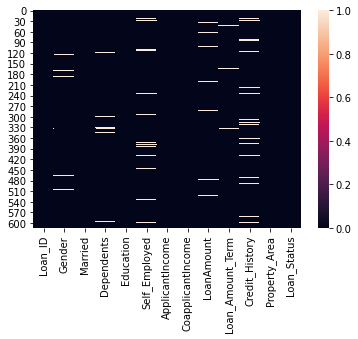

In [5]:
sns.heatmap(df.isnull()) # There is some columns having high missing values.such as credit_History,self_employed

In [6]:
df.dtypes # checking data types 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum() #before filling missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Exploratory Data analysis(EDA)

In [8]:
from sklearn.preprocessing import LabelEncoder # having string data need to convert into numric for further calculations.
lb=LabelEncoder()
df['Married']=lb.fit_transform(df['Married'])

In [9]:
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])

In [10]:
lb=LabelEncoder()
df['Education']=lb.fit_transform(df['Education'])

In [11]:
lb=LabelEncoder()
df['Self_Employed']=lb.fit_transform(df['Self_Employed'])

In [12]:
lb=LabelEncoder()
df['Property_Area']=lb.fit_transform(df['Property_Area'])

In [13]:
lb=LabelEncoder()
df['Loan_Status']=lb.fit_transform(df['Loan_Status'])

In [14]:
df['Loan_ID']=lb.fit_transform(df['Loan_ID'])

In [15]:
df['Dependents'].unique() # Dependents column having entry  3+ we replace with 3.

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) #filling missing values with mode

In [17]:
df['Dependents'].replace(['3+'],'3',inplace=True)

In [18]:
df.isnull().sum() #still there is null values present in data set we need to convert them.

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True) #filling missing values with mode

In [21]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) #filling missing values with mode

<AxesSubplot:xlabel='LoanAmount'>

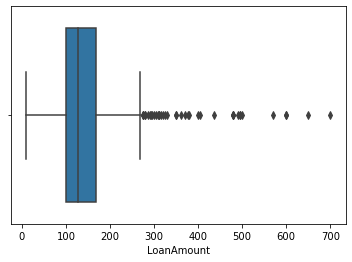

In [22]:
sns.boxplot(df['LoanAmount']) #in Amount column having much outlier so we cannot fill mean with missing values

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

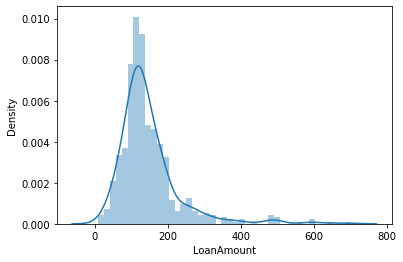

In [23]:
sns.distplot(df['LoanAmount']) # we have right skewd data so we need to replace with mode with missing  LoanAmount column.

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True) #filling missing values with mode

In [25]:
df.isnull().sum() # now there is no any missing data left so we will move forwored.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

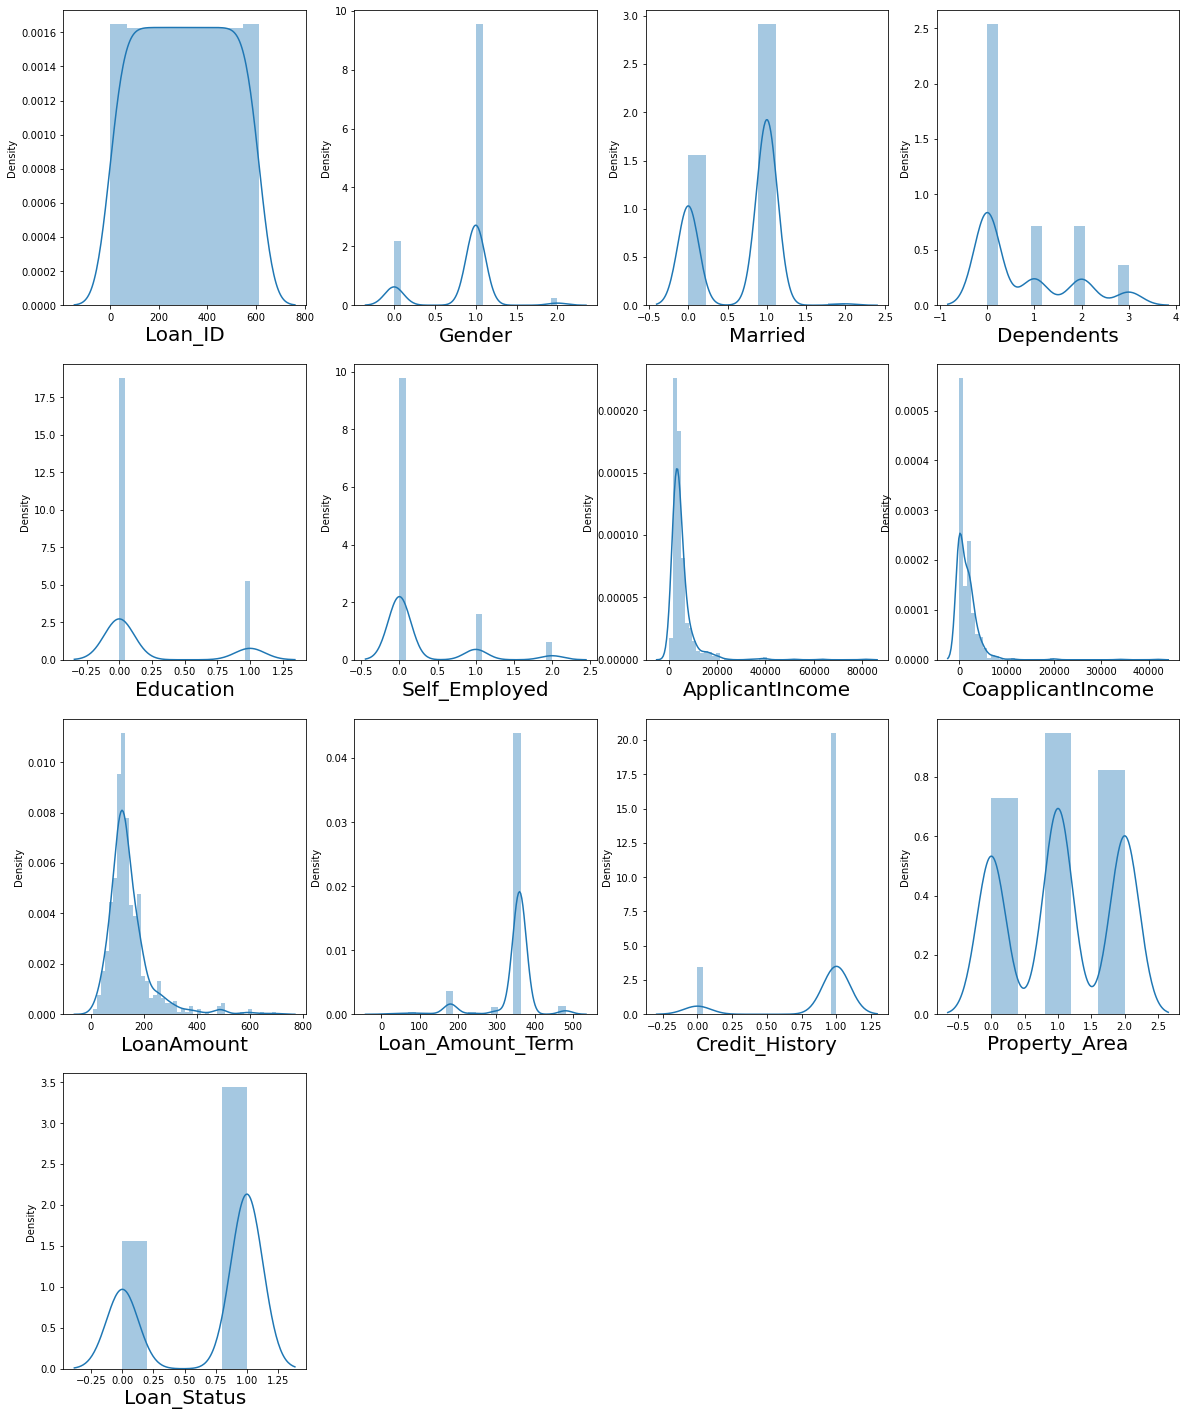

In [26]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
                                    #  We can see that there is skewed data present in data set so need to remove skewness.
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
q=df['CoapplicantIncome'].quantile(0.95) # coapplicants having skewd data so need to remove .
df1=df[df['CoapplicantIncome']<q]

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

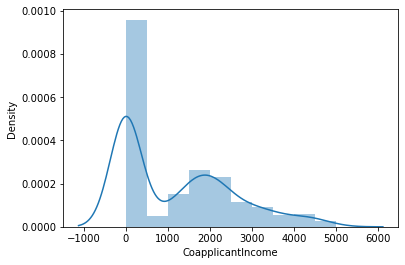

In [28]:
sns.distplot(df1['CoapplicantIncome'])
# cleaning right skewd data

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

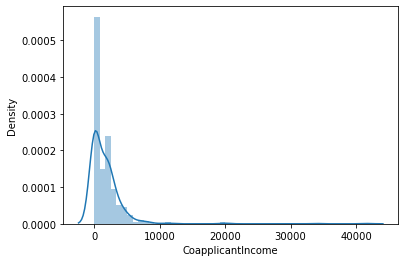

In [29]:
sns.distplot(df['CoapplicantIncome']) 

In [30]:
df1.describe() #Basic info related to statistics

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,306.893654,0.831904,0.653516,0.226415,0.240137,5408.552316,1197.214271,140.435678,343.430532,0.852487,1.041166,0.689537
std,177.087517,0.425814,0.486961,0.418870,0.537879,6173.237332,1339.783160,77.946445,63.512573,0.354921,0.787588,0.463081
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,152.500000,1.000000,0.000000,0.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,307.000000,1.000000,1.000000,0.000000,0.000000,3800.000000,983.000000,123.000000,360.000000,1.000000,1.000000,1.000000
75%,459.500000,1.000000,1.000000,0.000000,0.000000,5746.000000,2116.500000,160.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,1.000000,2.000000,81000.000000,4996.000000,700.000000,480.000000,1.000000,2.000000,1.000000


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

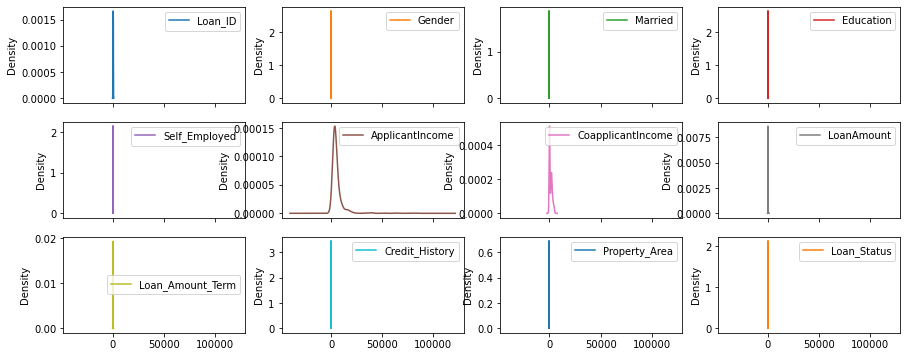

In [31]:
#to check Distribution of skewness
df1.plot(kind='kde',subplots=True,layout=(3,4),figsize=(15,6)) # only Applicantincome and coapplicantincame having skewd data 

In [32]:
from scipy.stats import boxcox #Removing applicantincome skewd data
df['ApplicantIncome']=boxcox(df['ApplicantIncome'],0)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

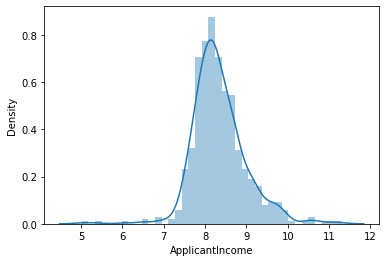

In [33]:
sns.distplot(df['ApplicantIncome'])

Loan_ID                 AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Gender               AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Married              AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Education            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Self_Employed           AxesSubplot(0.125,0.739237;0.168478x0.0639831)
ApplicantIncome      AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
CoapplicantIncome    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
LoanAmount           AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
Loan_Amount_Term        AxesSubplot(0.125,0.662458;0.168478x0.0639831)
Credit_History       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
Property_Area        AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
Loan_Status          AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
dtype: object

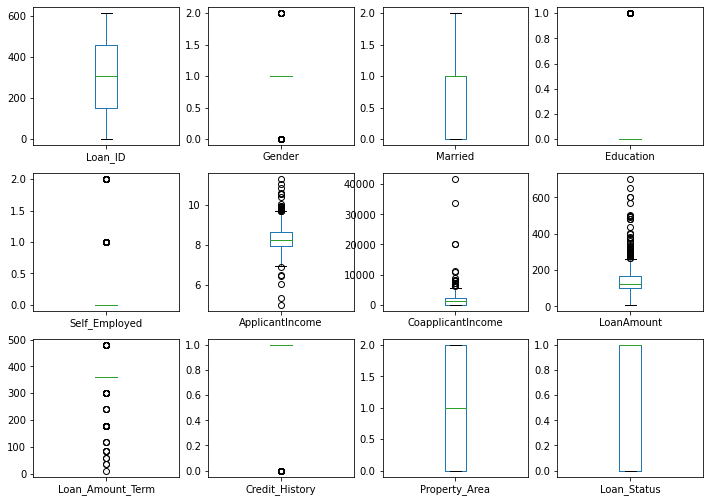

In [34]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(12,30)) #checking Outlier ,some of columns having high  outlier.

In [35]:
#Removing OUtlier
from scipy.stats import zscore 
z=np.abs(zscore(df['LoanAmount']))

In [36]:
z=np.abs(zscore(df['ApplicantIncome'])) # cleanig outlier in LoanAmount
z

array([5.16199037e-01, 1.37879350e-01, 5.19351690e-01, 7.51478358e-01,
       5.55732586e-01, 3.97191618e-01, 9.09366671e-01, 5.00850253e-01,
       7.08266153e-02, 1.73587749e+00, 4.19251233e-01, 8.02135844e-01,
       4.82062106e-01, 1.26664236e+00, 1.81758161e+00, 2.57360173e-01,
       2.38291848e-01, 2.75835931e-01, 2.37493239e-01, 7.41303782e-01,
       9.34572817e-01, 5.44056104e-01, 7.41303782e-01, 3.41270426e-01,
       1.86961232e-01, 1.27824095e+00, 6.26914962e-01, 1.20950070e-02,
       1.65559895e+00, 1.73251857e-01, 1.00839041e-02, 4.35329159e-01,
       1.74336240e-01, 2.80261094e-01, 1.69413254e+00, 9.48413476e-01,
       1.28771058e+00, 2.07966683e-01, 1.00839041e-02, 1.74079288e-01,
       2.36567536e-01, 1.31165181e+00, 8.65451523e-01, 9.61993263e-02,
       1.75327623e-01, 3.20666183e-01, 4.62235732e-01, 5.08756260e-01,
       7.14688889e-01, 7.31514003e-02, 1.20510220e+00, 4.75514525e-01,
       1.35623853e-02, 1.49007481e-01, 1.56480610e+00, 6.78179009e-01,
      

In [37]:
z=np.abs(zscore(df['Loan_Amount_Term'])) # Removing outlier
z

array([0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 3.45485794,
       0.2732313 , 1.59081332, 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 , 0.2732313 ,
       0.2732313 , 0.2732313 , 2.52283563, 0.2732313 , 0.2732313 ,
       0.2732313 , 2.52283563, 0.2732313 , 4.38688025, 0.2732313 ,
       0.2732313 , 0.2732313 , 0.65879101, 0.2732313 , 0.27323

In [38]:
z=np.abs(zscore(df['CoapplicantIncome']))# Removing outlier
z

array([5.54487330e-01, 3.87315485e-02, 5.54487330e-01, 2.51979602e-01,
       5.54487330e-01, 8.80599712e-01, 3.59954435e-02, 3.01913517e-01,
       3.25753123e-02, 3.19671255e+00, 3.15078148e-01, 7.48168067e-02,
       2.21787100e+00, 4.16829924e-01, 1.83061084e-01, 5.54487330e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 6.42558582e-01,
       5.54487330e-01, 1.36933646e+00, 9.90997380e-02, 1.01151817e-01,
       4.45901040e-01, 5.54487330e-01, 2.16068224e-01, 1.98793688e-01,
       5.54487330e-01, 1.57925994e-01, 5.97754864e-01, 5.54487330e-01,
       5.54487330e-01, 1.56485373e-02, 4.71552023e-01, 1.52453784e-01,
       9.96098834e-02, 5.54901912e-02, 1.91142725e+00, 1.59905504e-02,
       5.54487330e-01, 1.39625418e-01, 5.54487330e-01, 2.44455313e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 5.54487330e-01,
       6.22037795e-01, 2.23592513e-01, 7.78223556e-03, 5.54487330e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 1.55358022e-01,
      

### Correlation Matrix

<AxesSubplot:>

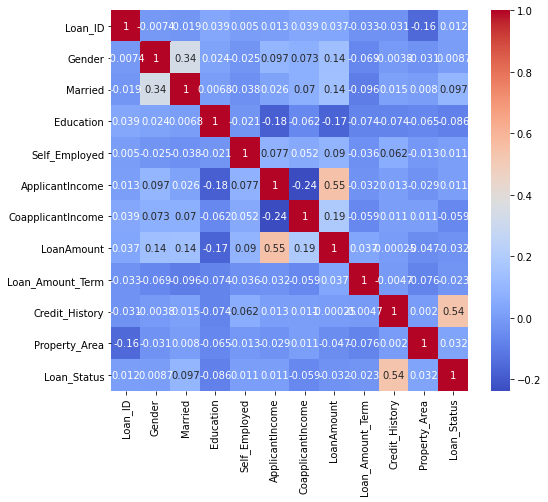

In [39]:
corr=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

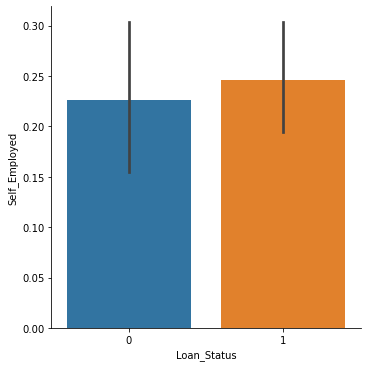

In [40]:
g=sns.catplot(x='Loan_Status',y='Self_Employed',data=df1,kind='bar')# there is more chanses to get a loan how is self employed.
plt.show()

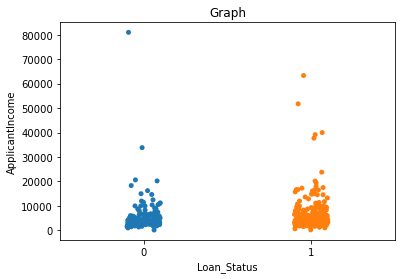

In [41]:
g=sns.stripplot(x='Loan_Status',y='ApplicantIncome',data=df1)
plt.title('Graph')
plt.show()
# there is more chanses to get a loan how have more income.


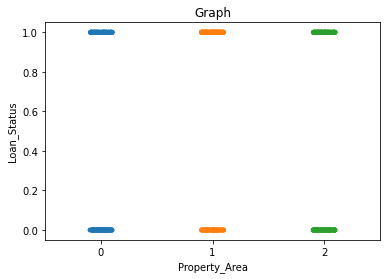

In [42]:
g=sns.stripplot(y='Loan_Status',x='Property_Area',data=df1)
plt.title('Graph')
plt.show()

### Train Test Split
     separating the columns into features and target:

In [43]:
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

### Standard Scaler

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # import libraries for model devloping .

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

### Find the  beast Random_state use here (currently we are moving shead with Random_state 42)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(614, 12) (491, 12) (123, 12)
(614,) (491,) (123,)


In [48]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [49]:
pred=lg.predict(x_test)

In [50]:
print("Accuracy_Score ::",accuracy_score(y_test,pred))

Accuracy_Score :: 0.7886178861788617


In [51]:
print(confusion_matrix(y_test,pred)) 

[[18 25]
 [ 1 79]]


### Model Training

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### AUC ROC Curve

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score
auc=roc_auc_score(y_test,pred)
fpr,tpr,thresholds=roc_curve(y_test,pred)

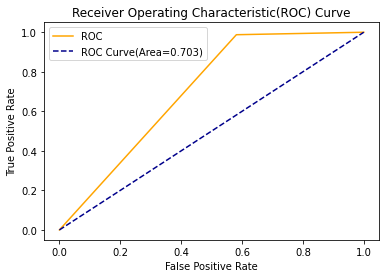

In [54]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  MultinomialNB GridSearchCV ,Cross Validation ,Model Develop 

In [55]:
parameters={'alpha':[1.0],'fit_prior':['bool']}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'fit_prior': 'bool'}


In [56]:
# MultinomialNB 1
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.5203252032520326
[[16 27]
 [32 48]]
              precision    recall  f1-score   support

           0       0.33      0.37      0.35        43
           1       0.64      0.60      0.62        80

    accuracy                           0.52       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.53      0.52      0.53       123



### KFold Cross Validation

In [57]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.47154472 0.49593496 0.4796748  0.56910569 0.57377049]
0.518006130880981
0.04435294784463598


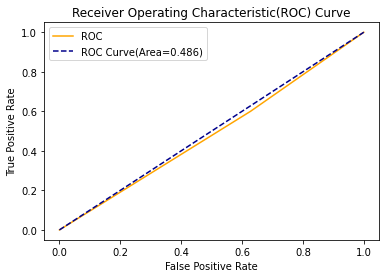

In [58]:
auc=roc_auc_score(y_test,predmnb)
fpr,tpr,thresholds=roc_curve(y_test,predmnb)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Support vector Machine Model,Cross Validation ,Hyperparameter Tuning

In [73]:
from sklearn.svm import SVC

parameters={'kernel':['linear','poly','rbf']}
svc=SVC() #(kernel='rbf')

clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'kernel': 'linear'}
0.7962688105545249


In [88]:
# Support Vector classifier
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Hold OUt

In [60]:
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8110888977742234

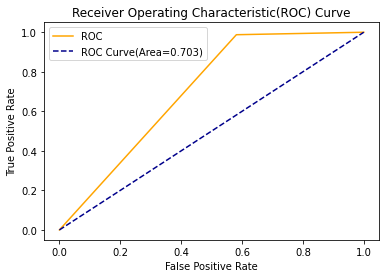

In [61]:
auc=roc_auc_score(y_test,predsvc)
fpr,tpr,thresholds=roc_curve(y_test,predsvc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### KNeighbors classifier Model,Cross Validation ,Hyperparameter tuning 

In [62]:
# KNeighbors classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6097560975609756
[[ 3 40]
 [ 8 72]]
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.64      0.90      0.75        80

    accuracy                           0.61       123
   macro avg       0.46      0.48      0.43       123
weighted avg       0.51      0.61      0.53       123



In [63]:
from sklearn.model_selection import KFold

score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.65853659 0.64227642 0.67479675 0.61788618 0.6557377 ]
0.6498467279754765
0.019034216290901473


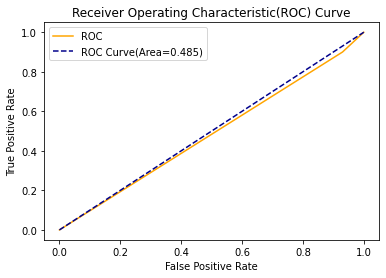

In [64]:
auc=roc_auc_score(y_test,predknn)
fpr,tpr,thresholds=roc_curve(y_test,predknn)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Support vector Machine Model,Cross Validation ,Hyperparameter Tuning

In [92]:
# Support vector Machine Kernal=ker,rbf,poly
from sklearn.svm import SVC

def SVMkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [66]:
SVMkernel('rbf')

0.6504065040650406
[[ 0 43]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



In [67]:
SVMkernel('poly')

0.6504065040650406
[[ 0 43]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



###  DecisionTreeClassifier :Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [68]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                               #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'entropy'}
0.6921098227375716
0.69


In [69]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7235772357723578
[[26 17]
 [17 63]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        43
           1       0.79      0.79      0.79        80

    accuracy                           0.72       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.72      0.72      0.72       123



In [70]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69105691 0.52845528 0.7398374  0.7804878  0.68852459]
0.6856723977075837
0.08564830107289452


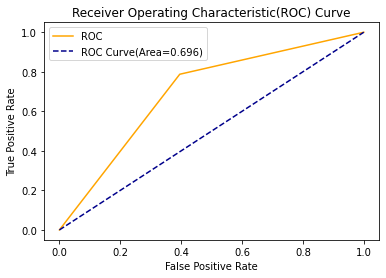

In [71]:
auc=roc_auc_score(y_test,preddtc)
fpr,tpr,thresholds=roc_curve(y_test,preddtc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### we are getting  SVC model accuracy 0.79 Cross validation Score 0.81 Hyperparameter tuning Grid Search CV Score 0.79 which is best.so our model  performing extremely well.

### Saving Best Model

In [74]:
import pickle 
filename='Loan_Application.pkl'
pickle.dump(svc,open(filename,'wb'))

### Conclusion:

In [89]:
import numpy as np
a=np.array(y_test)
predicted=np.array(svc.predict(x_test))
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,1,1


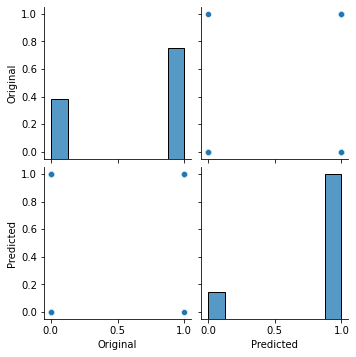

In [91]:
sns.pairplot(df)